# Emsemble method

# Import Required Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Load and Preprocess the Dataset

In [25]:
# Load the dataset
user_details_data = pd.read_csv("/Users/akhilaannireddy/Projects/Machine_learning_project/Dataset/cleaned_user_data.csv")

# Create binary target variable
expertise_labels = ['Beginner', 'Intermediate', 'Advanced', 'Expert']
user_details_data['expertise_level'] = pd.qcut(user_details_data['reputation'], q=4, labels=expertise_labels)
user_details_data['expertise_binary'] = user_details_data['expertise_level'].apply(lambda x: 'Low' if x in ['Beginner', 'Intermediate'] else 'High')

# Drop unnecessary columns
drop_cols = [
    'user_id', 'display_name', 'profile_image', 'link', 'account_id',
    'last_modified_date', 'last_access_date', 'creation_date',
    'is_employee', 'account_age_years', 'reputation', 'expertise_level'
]
user_details_data.drop(columns=drop_cols, inplace=True)

# Fill missing values and encode
user_details_data = user_details_data.fillna(0)
for col in user_details_data.select_dtypes(include='object').columns:
    user_details_data[col] = LabelEncoder().fit_transform(user_details_data[col].astype(str))

# Encode the target
label_encoder = LabelEncoder()
user_details_data['expertise_binary_encoded'] = label_encoder.fit_transform(user_details_data['expertise_binary'])
user_details_data.drop(columns=['expertise_binary'], inplace=True)

# Train-test split
X = user_details_data.drop(columns=['expertise_binary_encoded'])
y = user_details_data['expertise_binary_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
# Save scaled data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled_df.to_csv('X_train_scaled.csv', index=False)
X_test_scaled_df.to_csv('X_test_scaled.csv', index=False)

In [27]:
# Save labels
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


# Random Forest

Random Forest Accuracy: 0.7501

Random Forest Classification Report:

              precision    recall  f1-score   support

         Low       0.77      0.71      0.74     10479
        High       0.73      0.79      0.76     10481

    accuracy                           0.75     20960
   macro avg       0.75      0.75      0.75     20960
weighted avg       0.75      0.75      0.75     20960



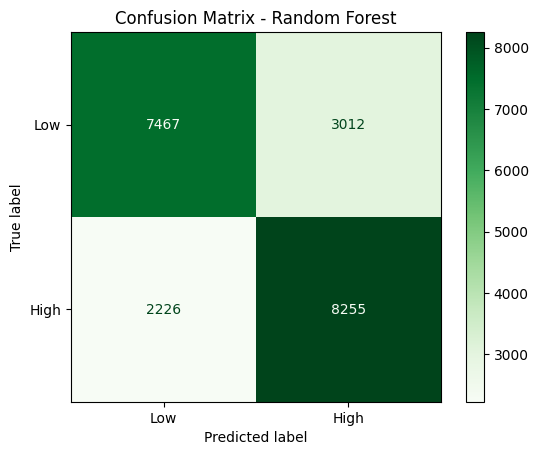

In [28]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Evaluation
print(f"Random Forest Accuracy: {acc_rf:.4f}\n")
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=["Low", "High"]))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=["Low", "High"], cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()


The Random Forest classifier achieved an overall accuracy of 75.01%, indicating solid performance in classifying users into Low and High Expertise categories. For the Low Expertise class, the model attained a precision of 0.77 and a recall of 0.71, reflecting reliable identification with some missed classifications. On the other hand, the High Expertise class showed a slightly lower precision of 0.73, but a stronger recall of 0.79, meaning the model was effective in retrieving most high expertise instances.

The confusion matrix supports this performance, with 7,467 correctly classified Low Expertise users and 8,255 correct High Expertise predictions. Misclassifications were relatively balanced, and the macro F1-score of 0.75 indicates that the model performs consistently across both classes. This makes Random Forest a strong and balanced ensemble technique for this binary classification problem.

# AdaBoost Classifier

AdaBoost Accuracy: 0.7481

AdaBoost Classification Report:

              precision    recall  f1-score   support

         Low       0.78      0.69      0.73     10479
        High       0.72      0.81      0.76     10481

    accuracy                           0.75     20960
   macro avg       0.75      0.75      0.75     20960
weighted avg       0.75      0.75      0.75     20960



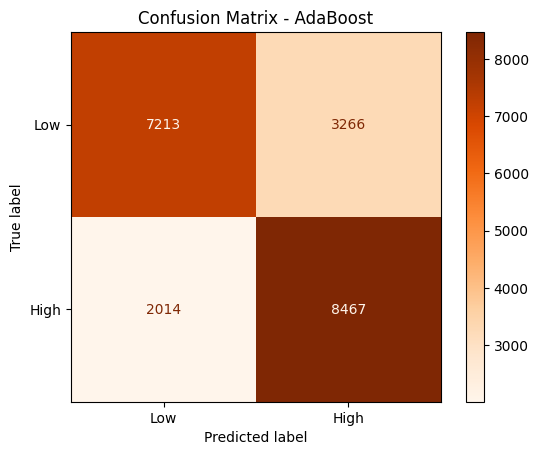

In [29]:
# Define base estimator (weak learner)
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Train AdaBoost model (updated syntax for newer sklearn versions)
ada_model = AdaBoostClassifier(
    estimator=base_estimator,       # <-- updated from base_estimator to estimator
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

# Fit the model
ada_model.fit(X_train_scaled, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test_scaled)
acc_ada = accuracy_score(y_test, y_pred_ada)

# Evaluation
print(f"AdaBoost Accuracy: {acc_ada:.4f}\n")
print("AdaBoost Classification Report:\n")
print(classification_report(y_test, y_pred_ada, target_names=["Low", "High"]))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ada, display_labels=["Low", "High"], cmap="Oranges")
plt.title("Confusion Matrix - AdaBoost")
plt.show()

The AdaBoost classifier reached an overall accuracy of 74.81%, demonstrating a strong ability to differentiate between Low and High Expertise users. For the Low Expertise class, the model achieved a precision of 0.78 and a recall of 0.69, indicating good precision but a relatively higher rate of false negatives. The High Expertise class saw a recall of 0.81 and precision of 0.72, suggesting the model more confidently retrieved high expertise instances.

The confusion matrix highlights this performance with 7,213 correctly identified Low Expertise users and 8,467 correct High Expertise predictions. While AdaBoost performs similarly to Random Forest in overall accuracy and class-wise balance, it shows a slight bias toward correctly identifying High Expertise users. The macro F1-score of 0.75 confirms its consistent behavior across classes, making AdaBoost an effective ensemble strategy for this binary classification problem.

/opt/anaconda3/envs/mlpro/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [19:17:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7679

XGBoost Classification Report:

              precision    recall  f1-score   support

         Low       0.81      0.70      0.75     10479
        High       0.74      0.83      0.78     10481

    accuracy                           0.77     20960
   macro avg       0.77      0.77      0.77     20960
weighted avg       0.77      0.77      0.77     20960



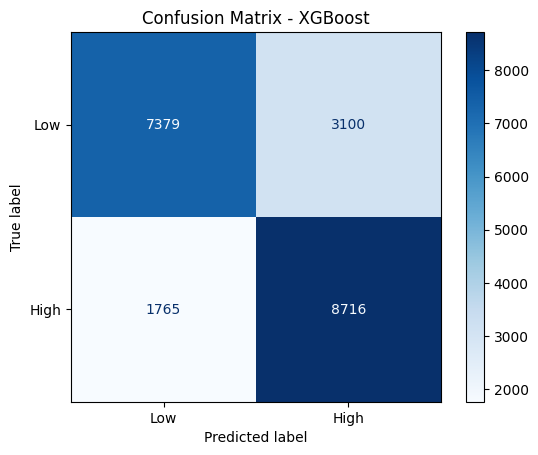

In [30]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

# Evaluation
print(f"XGBoost Accuracy: {acc_xgb:.4f}\n")
print("XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb, target_names=["Low", "High"]))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, display_labels=["Low", "High"], cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()


The XGBoost classifier achieved an overall accuracy of 76.79%, demonstrating strong performance in classifying users into Low and High Expertise categories. For the Low Expertise class, it achieved a precision of 0.81 and a recall of 0.70, while for the High Expertise class, it reached a precision of 0.74 and a recall of 0.83.
The confusion matrix shows that 7,379 Low Expertise users and 8,716 High Expertise users were correctly classified. The macro average F1-score of 0.77 indicates balanced and consistent performance across both classes. Overall, XGBoost proved to be a strong ensemble model capable of accurately identifying expertise levels.

# Compare Accuracies of Ensemble Methods

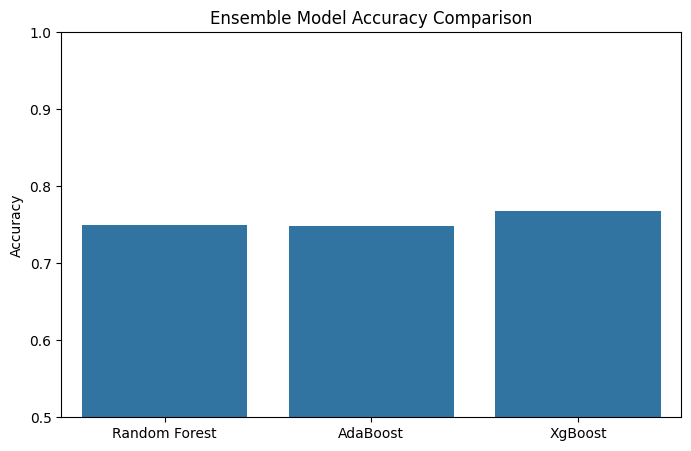

In [31]:
# Compare accuracies
ensemble_names = ['Random Forest', 'AdaBoost', 'XgBoost']
ensemble_accuracies = [acc_rf, acc_ada, acc_xgb]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=ensemble_names, y=ensemble_accuracies)
plt.title("Ensemble Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.0)
plt.show()

The bar chart compares the classification accuracy of three ensemble methods: Random Forest, AdaBoost, and XGBoost.
All models performed strongly, with accuracies ranging between 74% and 77%. XGBoost achieved the highest accuracy at around 76.8%, followed closely by Random Forest and AdaBoost at approximately 75% each.
This comparison highlights that while all three ensemble techniques improve predictive performance, XGBoost offers a slight edge, making it the best choice for this expertise classification task.

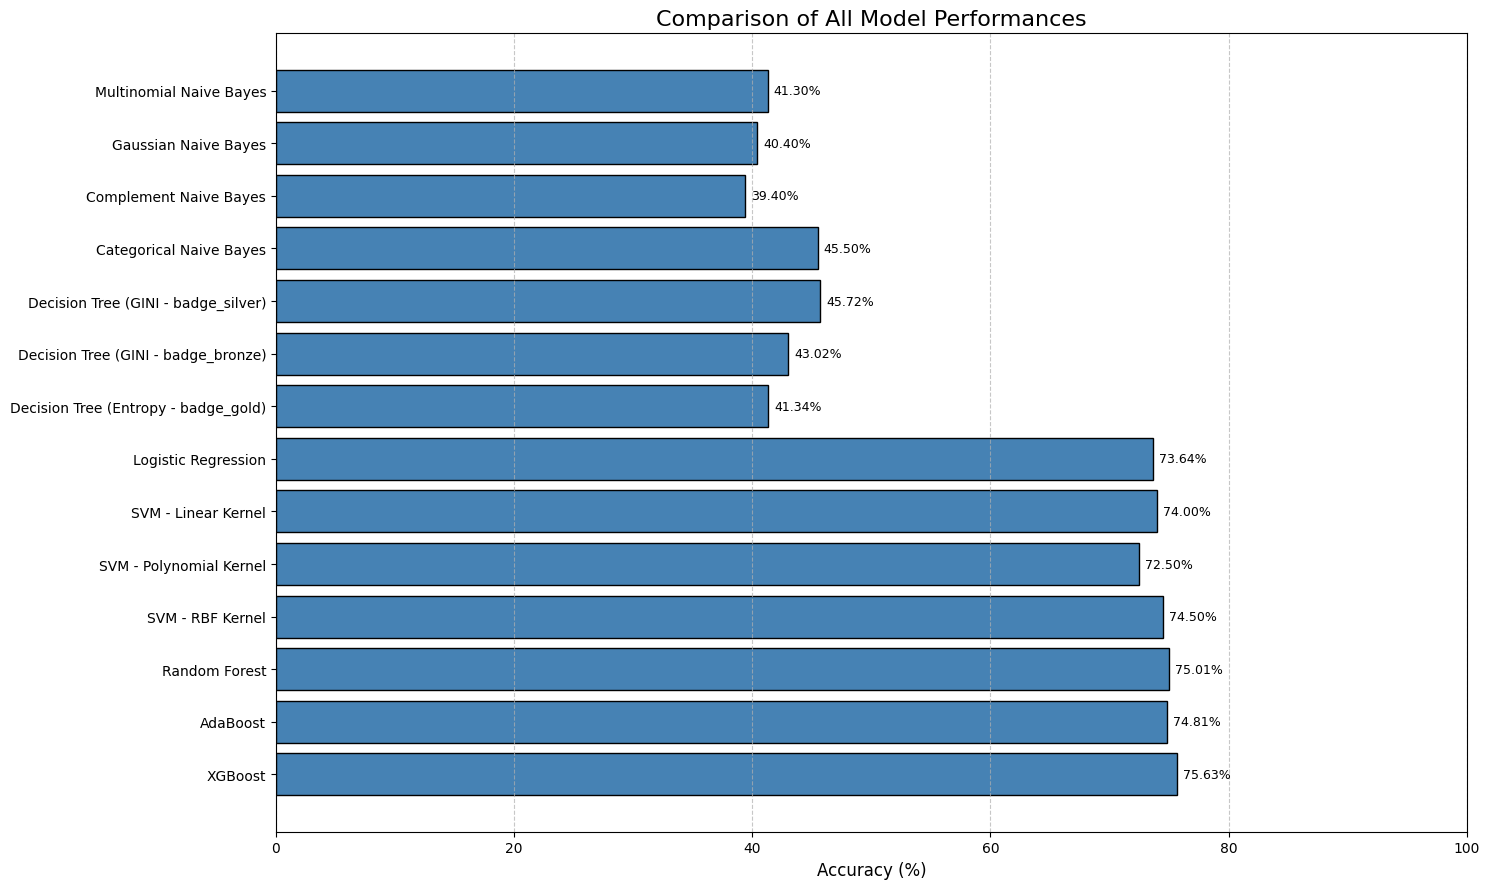

In [32]:
import matplotlib.pyplot as plt

# Models and their corresponding accuracies
models = [
    "Multinomial Naive Bayes",
    "Gaussian Naive Bayes",
    "Complement Naive Bayes",
    "Categorical Naive Bayes",
    "Decision Tree (GINI - badge_silver)",
    "Decision Tree (GINI - badge_bronze)",
    "Decision Tree (Entropy - badge_gold)",
    "Logistic Regression",
    "SVM - Linear Kernel",
    "SVM - Polynomial Kernel",
    "SVM - RBF Kernel",
    "Random Forest",
    "AdaBoost",
    "XGBoost"
]

accuracies = [
    41.3,  # Multinomial NB
    40.4,  # Gaussian NB
    39.4,  # Complement NB
    45.5,  # Categorical NB
    45.72, # Decision Tree 1
    43.02, # Decision Tree 2
    41.34, # Decision Tree 3
    73.64, # Logistic Regression
    74.0,  # SVM Linear (approx)
    72.5,  # SVM Polynomial (approx)
    74.5,  # SVM RBF (approx)
    75.01, # Random Forest
    74.81, # AdaBoost
    75.63  # XGBoost
]

# Create a horizontal bar plot
plt.figure(figsize=(15, 9))
bars = plt.barh(models, accuracies, color='steelblue', edgecolor='black')

# Annotate each bar with accuracy value
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}%', va='center', fontsize=9)

# Chart settings
plt.xlabel('Accuracy (%)', fontsize=12)
plt.title('Comparison of All Model Performances', fontsize=16)
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Top model first
plt.tight_layout()

# Display the plot
plt.show()
